## Monterey Bay Kelp PCA

This example uses data from the supplementary material of:

Graham, M. H. (2003), Confronting multicollinearity in ecological multiple regression. _Ecology_, 84: 2809–2815. doi:10.1890/02-3114 
http://onlinelibrary.wiley.com/doi/10.1890/02-3114/abstract

The details of observational methods can be found in an earlier paper:

Graham, M. H. (1997) Factors determining the upper limit of giant kelp, _Macrocystis pyrifera_ Agardh, along the Monterey Peninsula, central California, USA, _J. Exp. Mar. Bio. Ecol._, 218, 127-149.

#### Key concept

The final exercise in this notebook is:

Which principal component is most highly correlated with kelp extent? What is your interpretation of the relationship between kelp extent and environmental variability?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg

### Load data

In [2]:
df = pd.read_csv('data/Graham2003_Kelp/Originaldata.txt',delimiter=' ')

In [3]:
df.head()

,Response,OD,BD,LTD,W
0,3.241,2.0176,4.87,-0.59,-4.1
1,3.032,1.9553,4.78,-0.75,4.7
2,3.100,1.8131,3.14,-0.38,-4.9
3,3.156,2.5751,3.28,-0.16,-3.2
4,3.110,2.2589,3.28,0.01,5.6


Variables:

* Response - shallow (upper) distributional limit of kelp Macrocystis pyrifera [m]
* OD - wave orbital displacement [m]
* BD - wave breaking depth [m]
* LTD - minimum daily tidal height [m]
* W - wind velocity [m/s], positive onshore

Text(0, 0.5, 'depth [m]')

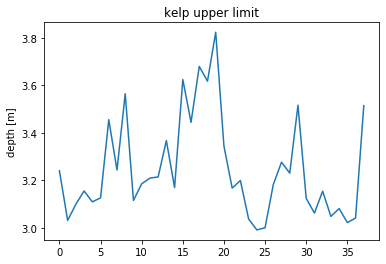

In [4]:
plt.figure()
plt.plot(df.index,df['Response'])
plt.title('kelp upper limit')
plt.ylabel('depth [m]')

a) Become familiar with data set, make plot each variable vs. the response (kelp) to see which variables have strongest correlation with response (kelp).

In [79]:
# insert code here

### Goal of analysis:

* Instead of correlating with one variable, we will use PCA to create an "index" of common environmental variability.

#### Key concept (again)

The final exercise in this notebook is:

Which principal component is most highly correlated with kelp extent? What is your interpretation of the relationship between kelp extent and environmental variability?

### PCA Step 1: data matrix

Put our environmental variables into matrix form. This matrix (which excludes the response variable) has four columns.

In [80]:
# insert code here

### Standardize data

b) After creating an array for the environmental data:

Standardize the environmental data by transforming to z-scores.

For each column, subtract the mean and divide by the standard deviation. This should transform each column into a standardized variable with a mean of 0 and a standard deviation of 1.

*Hint:* Use the `ddof=1` option with `np.std`.

In [5]:
# insert code here

## PCA Step 2: correlation (or covariance) matrix
Next create the correlation matrix. We can also think of this as the covariance matrix of the standardized variables. If we don't standardize the variables, we end up weighting them differently simply based on how big the numbers are.

In [6]:
# insert code here

## PCA Step 3: extract eigenvalues and eigenvectors

$$RV = V\Lambda$$

The eigenvalues are in the matrix $\Lambda$ 

The eigenvectors are in the matrix $V$

In [7]:
# insert code here

c) After extracting the eigenvectors and eigenvalues of the correlation matrix:

Find the percentage of total variance explained by each principal component.

In [8]:
# insert code here

### Factor loading matrix

Eigenvectors times square root of eigenvectors

$$A = V\sqrt{\Lambda}$$

The columns of this new A matrix are called the factor loadings for each principal component. We can think of new axes for the data in a space defined by waves, wind and tides. The factor loadings define those axes - both the orientation (eigenvector) and the spread of the data across each axis (square root of eigenvalue - which describes the standard deviation).

In [9]:
# insert code here

A common way of visualizing the results of PCA is to plot the factor loadings for the first two principal components (the first two columns of the A matrix). If variables are clumped together, it means that they covary (similar direction with respect to origin), with similar magnitudes (similar distance from origin). 

This plot can be thought of as viewing the original data axes (which exist in four-dimensional space) from a perspective that is perpendicular to the plane defined by the first two PC's. It is the _projection_ of the original axes onto the 2D plane defined by the first two PCs.

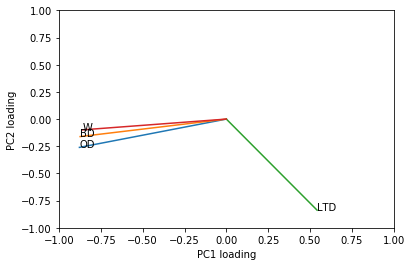

In [85]:
plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['OD','BD','LTD','W']
for i,txt in enumerate(variables):
    plt.plot([0,A[i,0]],[0,A[i,1]],'-')
    plt.text(A[i,0],A[i,1],txt)

### Principal component score
This is the projection of each data vector onto new component axes. It is the new variables created from the original data, based on rotating axes. Each principal component score can be thought of as an "index" of envrionmental variability.

In [10]:
# insert code here

d) Key concept

Which principal component is most highly correlated with kelp extent? What is your interpretation of the relationship between kelp extent and environmental variability?